In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def getDf():
    files = {}
    for size in [1000000, 1500000, 10000000, 15000000]:
        with open("../result/resultRustVarious_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size1000000']
    for s in [1500000, 10000000, 15000000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "method": str, "type": str, "mutability": str , "size": int, "inittime": int, \
                    "addtime": int, 'accesstime': int,"totaltime": int, "correct": bool})
    return data

In [18]:
df = getDf()

In [22]:
df

,datastructure,method,type,mutability,size,inittime,addtime,accesstime,totaltime,correct
1,[RustVector],"""memcpy""","""Integer""","""mutable""",1000000,7586,2495827,602,89676304,True
2,[RustVector],"""memcpy""","""Integer""","""mutable""",1000000,5930,2514235,345,90053154,True
3,[RustVector],"""memcpy""","""Integer""","""mutable""",1000000,6177,2513608,524,89196082,True
4,[RustVector],"""memcpy""","""Integer""","""mutable""",1000000,5908,2509259,656,89043315,True
5,[RustVector],"""memcpy""","""Integer""","""mutable""",1000000,6168,2548977,353,89428565,True
...,...,...,...,...,...,...,...,...,...,...
76,[RustVector],"""clone_from""","""String""","""immutable""",15000000,6314,1705122526,1453318745,78747876796,True
77,[RustVector],"""clone_from""","""String""","""immutable""",15000000,5869,1698285015,1452077244,78788601893,True
78,[RustVector],"""clone_from""","""String""","""immutable""",15000000,5837,1717367639,1457675465,79066096471,True
79,[RustVector],"""clone_from""","""String""","""immutable""",15000000,5883,1700760852,1456718305,79515609229,True


In [20]:
df_average = df.groupby(["method", "type", "size"]).mean().reset_index()

In [21]:
df_average

,method,type,size,inittime,addtime,accesstime,totaltime,correct
0,"""clone""","""Integer""",1000000,5818.0,2.613307e+06,8.908851e+07,5.995851e+08,True
1,"""clone""","""Integer""",1500000,6507.6,3.859232e+06,1.337861e+08,9.027599e+08,True
2,"""clone""","""Integer""",10000000,6346.4,2.448787e+07,8.911311e+08,5.999954e+09,True
3,"""clone""","""Integer""",15000000,6293.8,3.690191e+07,1.337513e+09,9.034271e+09,True
4,"""clone""","""String""",1000000,5647.8,1.046197e+08,9.584081e+07,5.226772e+09,True
5,"""clone""","""String""",1500000,6353.1,1.603298e+08,1.450640e+08,7.902570e+09,True
6,"""clone""","""String""",10000000,6270.0,1.152099e+09,9.717869e+08,5.271440e+10,True
7,"""clone""","""String""",15000000,6328.5,1.726840e+09,1.455808e+09,7.900571e+10,True
8,"""clone_from""","""Integer""",1000000,6011.3,2.525527e+06,8.892700e+07,5.998809e+08,True
9,"""clone_from""","""Integer""",1500000,7065.9,3.838928e+06,1.342224e+08,9.056068e+08,True


In [7]:
df_avg_int = df_average[df_average["type"] == '"Integer"']

In [8]:
df_avg_int

,method,type,size,mutability,inittime,addtime,accesstime,totaltime,correct
0,"""clone""","""Integer""",1000000,True,5818.0,2.613307e+06,8.908851e+07,5.995851e+08,True
1,"""clone""","""Integer""",1500000,True,6507.6,3.859232e+06,1.337861e+08,9.027599e+08,True
2,"""clone""","""Integer""",10000000,True,6346.4,2.448787e+07,8.911311e+08,5.999954e+09,True
3,"""clone""","""Integer""",15000000,True,6293.8,3.690191e+07,1.337513e+09,9.034271e+09,True
8,"""clone_from""","""Integer""",1000000,True,6011.3,2.525527e+06,8.892700e+07,5.998809e+08,True
9,"""clone_from""","""Integer""",1500000,True,7065.9,3.838928e+06,1.342224e+08,9.056068e+08,True
10,"""clone_from""","""Integer""",10000000,True,6540.8,2.476461e+07,8.938025e+08,6.033820e+09,True
11,"""clone_from""","""Integer""",15000000,True,8098.8,3.679628e+07,1.339316e+09,9.038249e+09,True
16,"""memcpy""","""Integer""",1000000,True,6292.6,2.521615e+06,6.029000e+02,4.222768e+08,True
17,"""memcpy""","""Integer""",1500000,True,6299.9,3.823620e+06,7.350000e+02,6.372327e+08,True


In [9]:
df_avg_string = df_average[df_average["type"] == '"String"']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


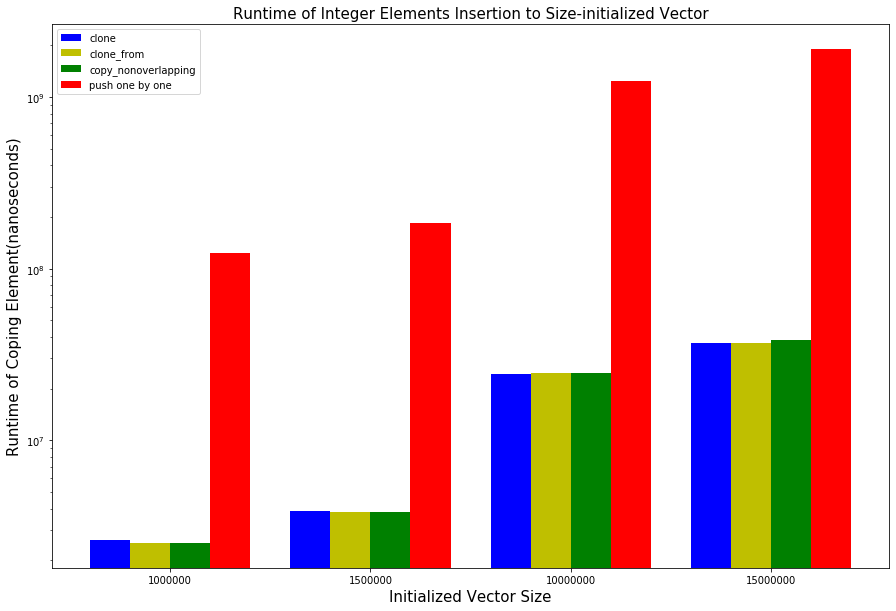

In [12]:
clone = df_avg_int[df_avg_int["method"] == '"clone"']
clone_from = df_avg_int[df_avg_int["method"] == '"clone_from"']
memcpy = df_avg_int[df_avg_int["method"] == '"memcpy"']
onebyone = df_avg_int[df_avg_int["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
label = np.sort(df_avg_int['size'].unique())
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
fig.savefig("rust_various_insertion_integer.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


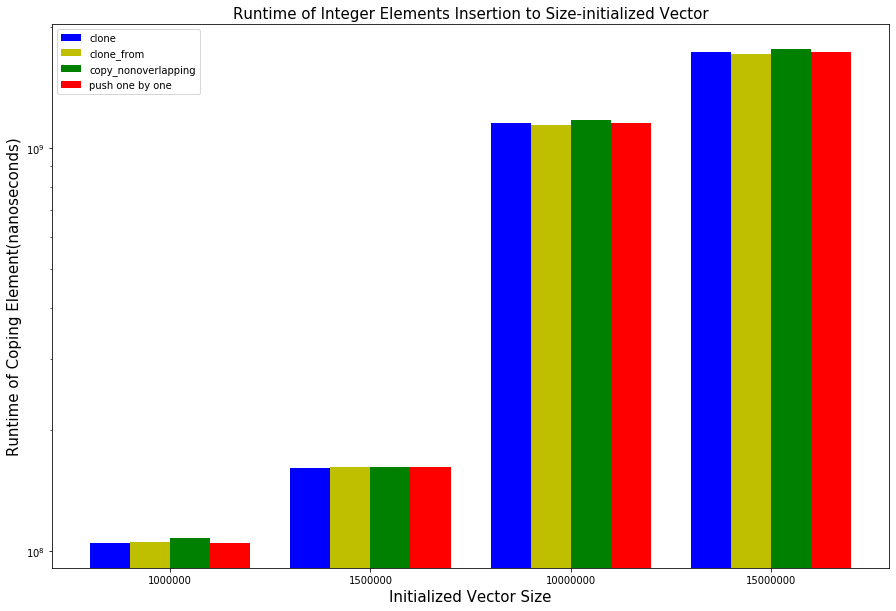

In [13]:
clone = df_avg_string[df_avg_string["method"] == '"clone"']
clone_from = df_avg_string[df_avg_string["method"] == '"clone_from"']
memcpy = df_avg_string[df_avg_string["method"] == '"memcpy"']
onebyone = df_avg_string[df_avg_string["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
fig.savefig("rust_various_insertion_string.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


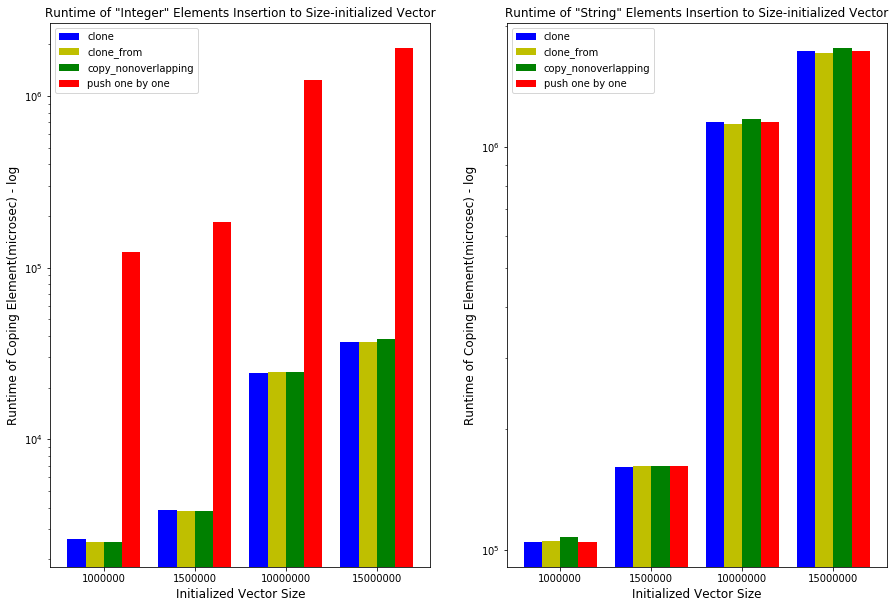

In [79]:
df_average = df.groupby(["method", "type", "size"]).mean().reset_index()
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
w = 0.2
idx = np.arange(df_average['size'].nunique())
for i, t in enumerate(['"Integer"', '"String"']):
    df_avg_type = df_average[df_average["type"] == t]
    clone = df_avg_type[df_avg_type["method"] == '"clone"']
    clone_from = df_avg_type[df_avg_type["method"] == '"clone_from"']
    memcpy = df_avg_type[df_avg_type["method"] == '"memcpy"']
    onebyone = df_avg_type[df_avg_type["method"] == '"onebyone"']
    b1 = ax[i].bar(idx - 2*w, clone["addtime"] / 1000, width = w, color ='b', align = 'center')
    b2 = ax[i].bar(idx - w, clone_from["addtime"] / 1000, width = w, color ='y', align = 'center')
    b3 = ax[i].bar(idx , memcpy['addtime'] / 1000, width = w, color ='g', align = 'center')
    b4 = ax[i].bar(idx + w, onebyone['addtime'] / 1000, width = w, color ='r', align = 'center')
    ax[i].set_xticks(idx - w/ 2)
    ax[i].set_xticklabels(label)
    ax[i].set_xlabel("Initialized Vector Size", fontsize = 12)
    ax[i].set_ylabel("Runtime of Coping Element(microsec) - log", fontsize = 12)
    ax[i].set_title("Runtime of {} Elements Insertion to Size-initialized Vector".format(t), fontsize = 12)
    ax[i].legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
    ax[i].set_yscale('log')
fig.savefig("rust_various_insertion.eps")
plt.show()

In [58]:
df_average_access = df.groupby(["method", "type","mutability", "size"]).mean().reset_index()

In [61]:
df_average_access_integer = df_average_access[df_average_access["type"] == '"Integer"'].groupby(['mutability','size']).mean().reset_index()

In [62]:
df_average_access_string = df_average_access[df_average_access["type"] == '"String"'].groupby(['mutability','size']).mean().reset_index()

In [63]:
df_average_access_integer[df_average_access_integer["mutability"] == '"immutable"']

,mutability,size,inittime,addtime,accesstime,totaltime,correct
0,"""immutable""",1000000,6047.05,3.221084e+07,6.658930e+07,9.178785e+08,True
1,"""immutable""",1500000,6414.25,4.817034e+07,1.002703e+08,1.383326e+09,True
2,"""immutable""",10000000,6438.35,3.259143e+08,6.680672e+08,9.214640e+09,True
3,"""immutable""",15000000,6857.45,5.039888e+08,1.000943e+09,1.385614e+10,True


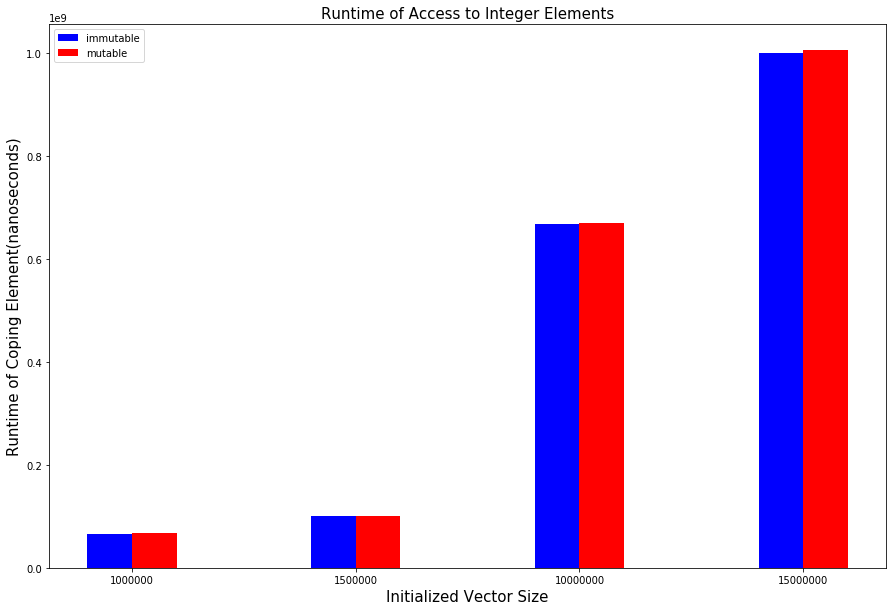

In [65]:
immutable_integer = df_average_access_integer[df_average_access_integer["mutability"] == '"immutable"']
mutable_integer = df_average_access_integer[df_average_access_integer["mutability"] == '"mutable"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(4);
b1 = ax.bar(idx , immutable_integer["accesstime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w, mutable_integer["accesstime"], width = w, color ='r', align = 'center')
ax.set_xticks(idx + w / 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Access to Integer Elements", fontsize = 15)
ax.legend((b1, b2), ("immutable", "mutable"))
plt.show()

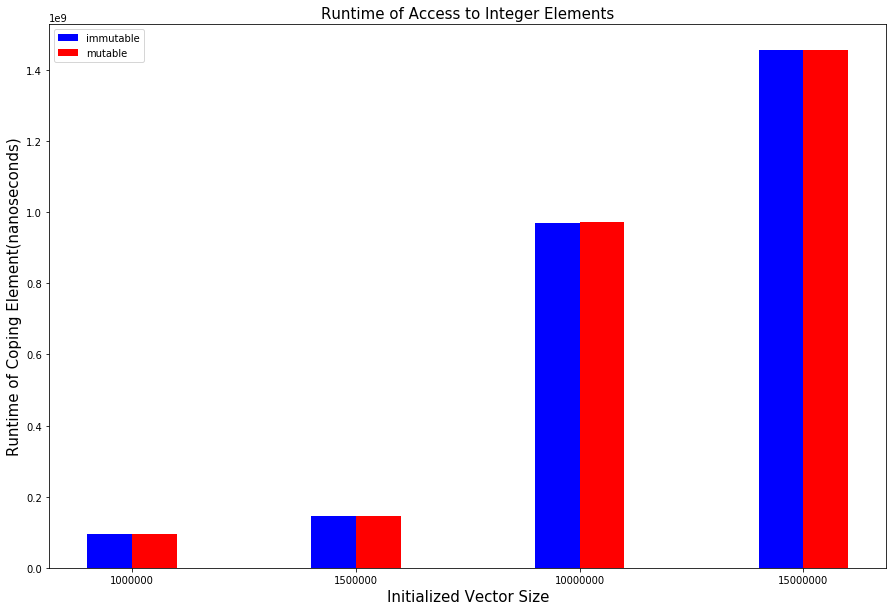

In [66]:
immutable_string = df_average_access_string[df_average_access_string["mutability"] == '"immutable"']
mutable_string = df_average_access_string[df_average_access_string["mutability"] == '"mutable"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(4);
b1 = ax.bar(idx , immutable_string["accesstime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w, mutable_string["accesstime"], width = w, color ='r', align = 'center')
ax.set_xticks(idx + w / 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Access to Integer Elements", fontsize = 15)
ax.legend((b1, b2), ("immutable", "mutable"))
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


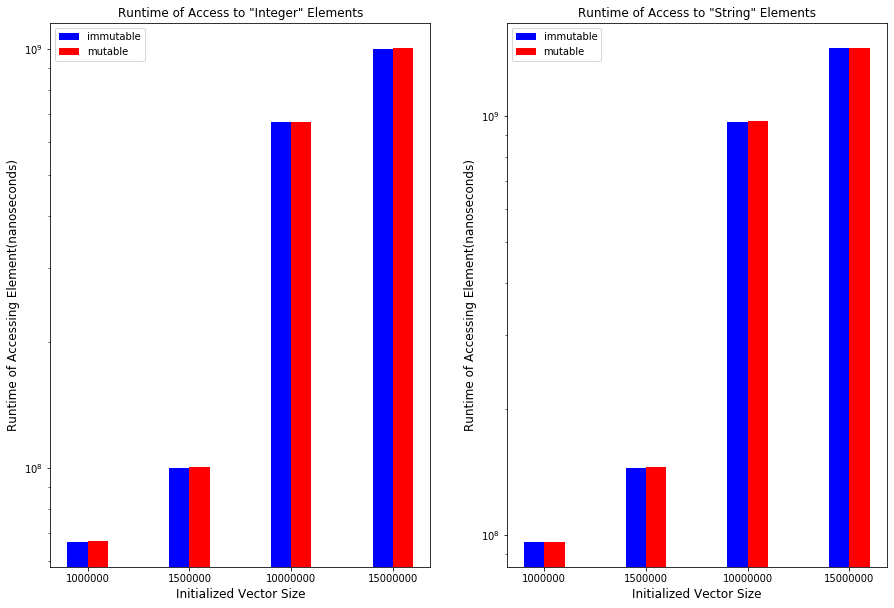

In [80]:
df_average_access = df.groupby(["method", "type","mutability", "size"]).mean().reset_index()
df_average_access_integer = df_average_access[df_average_access["type"] == '"Integer"'].groupby(['mutability','size']).mean().reset_index()
df_average_access_string = df_average_access[df_average_access["type"] == '"String"'].groupby(['mutability','size']).mean().reset_index()
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
w = 0.2
for i, t in enumerate(['"Integer"', '"String"']):
    df_average_access_type = df_average_access[df_average_access["type"] == t].groupby(['mutability','size']).mean().reset_index()
    immutable = df_average_access_type[df_average_access_type["mutability"] == '"immutable"']
    mutable = df_average_access_type[df_average_access_type["mutability"] == '"mutable"']
    idx = np.arange(4);
    b1 = ax[i].bar(idx , immutable["accesstime"], width = w, color ='b', align = 'center')
    b2 = ax[i].bar(idx + w, mutable["accesstime"], width = w, color ='r', align = 'center')
    ax[i].set_xticks(idx + w / 2)
    ax[i].set_xticklabels(label)
    ax[i].set_xlabel("Initialized Vector Size", fontsize = 12)
    ax[i].set_ylabel("Runtime of Accessing Element(nanoseconds)", fontsize = 12)
    ax[i].set_title("Runtime of Access to {} Elements".format(t), fontsize = 12)
    ax[i].legend((b1, b2), ("immutable", "mutable"))
    ax[i].set_yscale('log')
fig.savefig("rust_various_access.eps")
plt.show()